In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import simtk.openmm as mm
from torsionfit.database import qmdatabase as ScanSet
import torsionfit.model as Model
from torsionfit.backends import sqlite_plus
from pymc import MCMC
from parmed.charmm import CharmmParameterSet
from torsionfit import plots
from matplotlib.backends.backend_pdf import PdfPages
import torsionfit.parameters as par
from collections import OrderedDict
import numpy as np
from pymbar.timeseries import detectEquilibration
import tqdm

In [2]:
param_to_opt=[('CG331', 'CG321', 'CG321', 'CG331')]
param = CharmmParameterSet('../../../../../data/charmm_ff/top_all36_cgenff.rtf', 
                           '../../../../../data/charmm_ff/par_all36_cgenff.prm')
structure = '../../../../structure/butane.psf'
scan = '../../../../torsion_scans/MP2_torsion_scan/'
# Print initial guess

# Create a butane scan with torsions on (to compare for difference potential)
butane_scan = ScanSet.parse_psi4_out(scan, structure)
optimized = butane_scan.remove_nonoptimized()
optimized.compute_energy(param)

# Turn off torsion
param.dihedral_types[('CG331', 'CG321', 'CG321', 'CG331')][1].phi_k=0
param.dihedral_types[('CG331', 'CG321', 'CG321', 'CG331')][0].phi_k=0

# Create butane scan with torsions off
optimized_0 = butane_scan.remove_nonoptimized()
optimized_0.compute_energy(param)

[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/sampling_torsions/c_c_c_c_torsion/n5_rj/10000/../../../../torsion_scans/MP2_torsion_scan/0/butane_0.out2 WARNING] In logfileparser.py, line 468, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/sampling_torsions/c_c_c_c_torsion/n5_rj/10000/../../../../torsion_scans/MP2_torsion_scan/10/butane_10.out2 WARNING] In logfileparser.py, line 468, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/sampling_torsions/c_c_c_c_torsion/n5_rj/10000/../../../../torsion_scans/MP2_torsion_scan/20/butane_20.out2 WARNING] In logfileparser.py, line 468, line not all dashes as expected: ---------------------------------------------------------------------------------------------

/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/torsionfit-0+untagged.556.g949a22e-py3.5.egg/torsionfit/database/qmdatabase.py:188: UserWarning: Warning: Optimizer failed for /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/sampling_torsions/c_c_c_c_torsion/n5_rj/10000/../../../../torsion_scans/MP2_torsion_scan/10/butane_10.out2
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/sampling_torsions/c_c_c_c_torsion/n5_rj/10000/../../../../torsion_scans/MP2_torsion_scan/30/butane_30.out2 WARNING] In logfileparser.py, line 468, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/sampling_torsions/c_c_c_c_torsion/n5_rj/10000/../../../../torsion_scans/MP2_torsion_scan/40/butane_40.out2 WARNING] In logfileparser.py, line 468, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/sampling_torsions/c_c_c_c_torsion/n5_rj/10000/../../../../torsion_scans/MP2_torsion_scan/50/butane_50.out2 WARNING] In logfileparser.py, line 468, line not all dashes as expected: -------------------------------------------------------------------------------------------

In [10]:
# Load samplers
dbs = OrderedDict()
for i in range(1, 25):
    dbs['db_{}'.format(i)] = sqlite_plus.load('random_10000_{}/random_10000_{}.sqlite'.format(i, i))

<DihedralTypes [<DihedralType; phi_k=0.154, per=2, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.000, per=6, phase=180.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.155, per=1, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.000, per=3, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.000, per=4, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.000, per=5, phase=0.000,  scee=1.000, scnb=1.000>]>
<DihedralTypes [<DihedralType; phi_k=0.159, per=2, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.000, per=6, phase=180.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.139, per=1, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.085, per=3, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.000, per=4, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.000, per=5, phase=0.000,  scee=1.000, scnb=1.000>]>
<DihedralTypes [<DihedralType; phi_k=0.205, per=2, phase=0.000,  scee=1.00

/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<DihedralTypes [<DihedralType; phi_k=0.000, per=2, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.000, per=6, phase=180.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.000, per=1, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.000, per=3, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.092, per=4, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.000, per=5, phase=0.000,  scee=1.000, scnb=1.000>]>
<DihedralTypes [<DihedralType; phi_k=0.192, per=2, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.000, per=6, phase=180.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.000, per=1, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.000, per=3, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.000, per=4, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.000, per=5, phase=0.000,  scee=1.000, scnb=1.000>]>
<DihedralTypes [<DihedralType; phi_k=0.138, per=2, phase=0.000,  scee=1.00

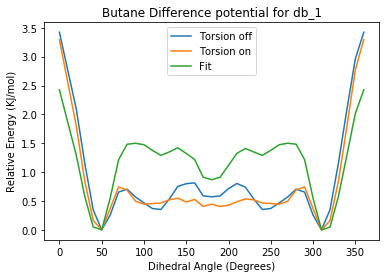

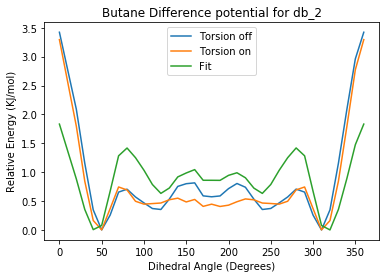

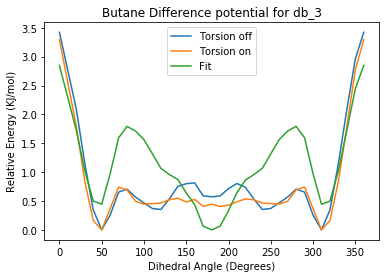

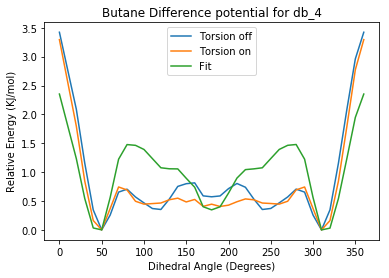

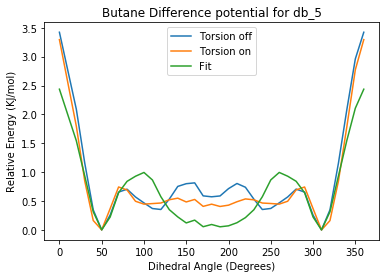

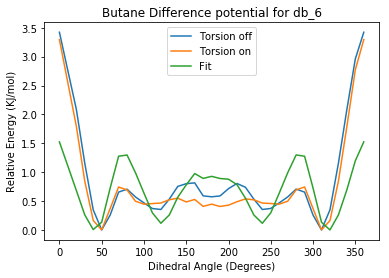

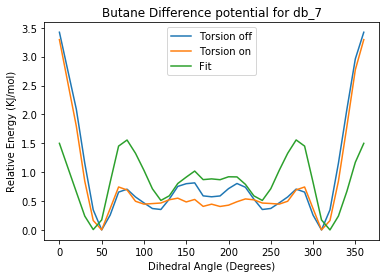

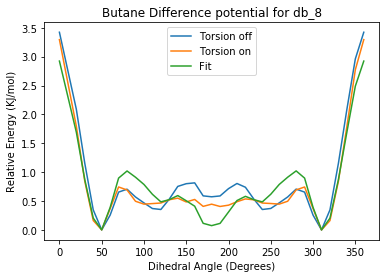

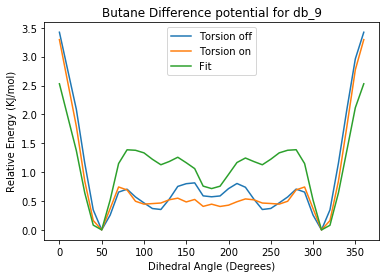

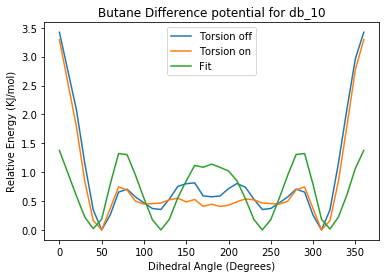

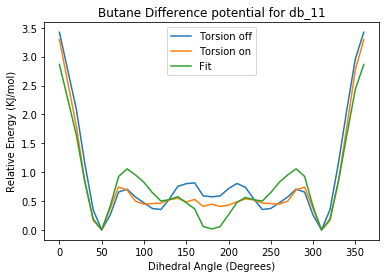

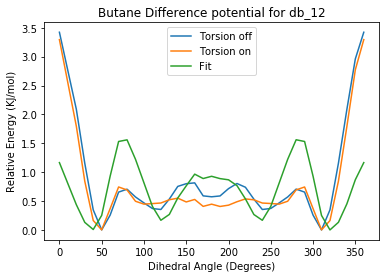

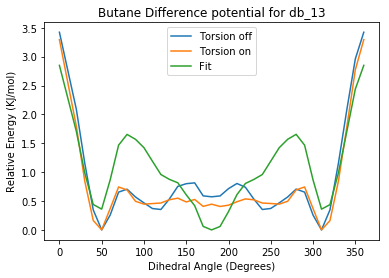

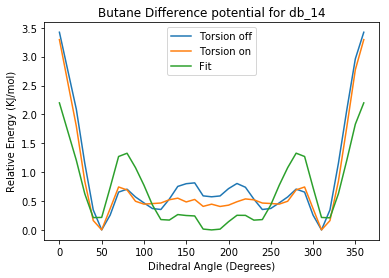

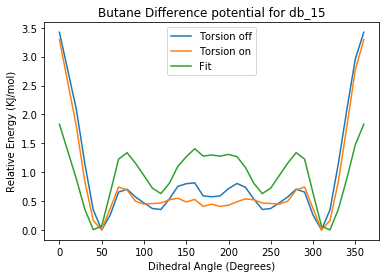

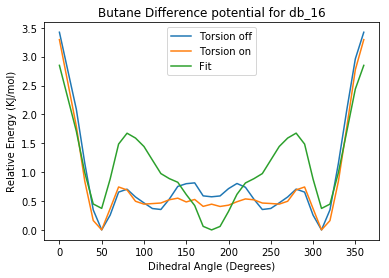

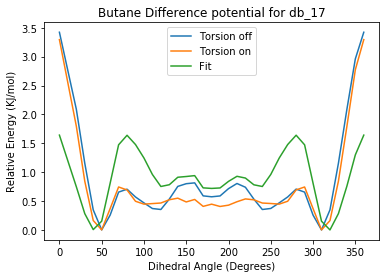

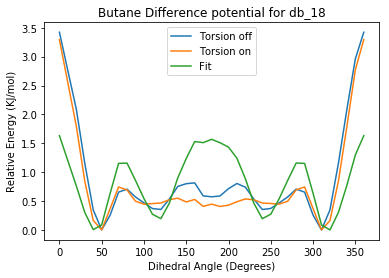

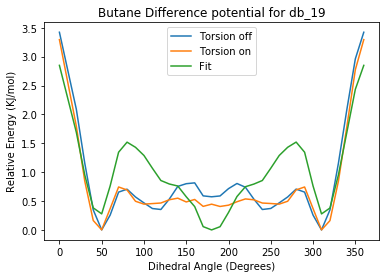

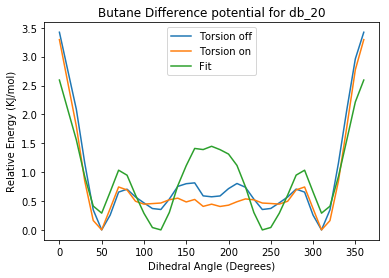

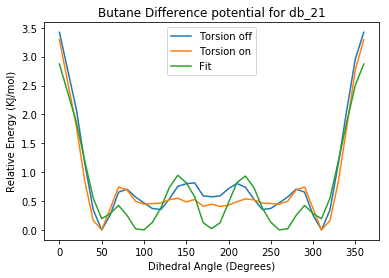

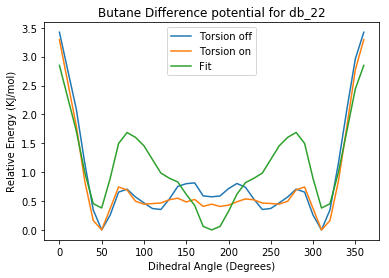

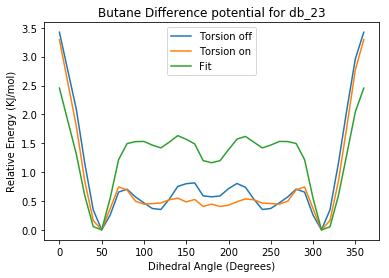

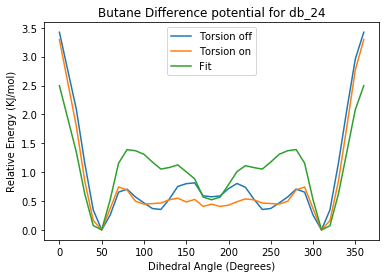

In [11]:
# Difference potential
# look at difference potential
new_param = CharmmParameterSet('../../../../../data/charmm_ff/top_all36_prot.rtf',
                              '../../../../../data/charmm_ff/par_all36_cgenff.prm')
new_struct = butane_scan.remove_nonoptimized()
# parameterize with db_0
par.add_missing(param_list=param_to_opt, param=new_param, sample_n5=True)
with PdfPages('difference_potential.pdf') as pdf:
    # Update parameters
    for db in dbs:
        plt.figure()
        par.update_param_from_sample(param_list=param_to_opt, param=new_param, db=dbs[db], n_5=True, rj=True)

        # Check
        print(new_param.dihedral_types[param_to_opt[0]])    
        new_struct.compute_energy(new_param)
        plt.plot(optimized_0.angles, optimized_0.delta_energy-min(optimized_0.delta_energy), label='Torsion off')
        plt.plot(optimized.angles, optimized.delta_energy-min(optimized.delta_energy), label='Torsion on')
        plt.plot(new_struct.angles, new_struct.delta_energy - min(new_struct.delta_energy), label='Fit')
        plt.legend()
        plt.xlabel('Dihedral Angle (Degrees)')
        plt.ylabel('Relative Energy (KJ/mol)')
        plt.title('Butane Difference potential for {}'.format(db))
        pdf.savefig()

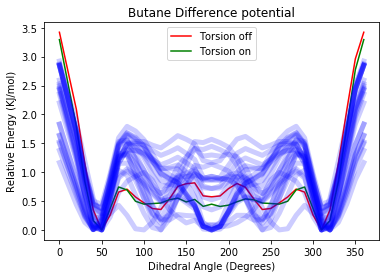

In [222]:
# Difference potential
# look at difference potential
new_param = CharmmParameterSet('../../../../../data/charmm_ff/top_all36_prot.rtf',
                              '../../../../../data/charmm_ff/par_all36_cgenff.prm')
new_struct = butane_scan.remove_nonoptimized()
# parameterize with db_0
par.add_missing(param_list=param_to_opt, param=new_param, sample_n5=True)
par.set_phase_0(param_list=param_to_opt, param=new_param)
with PdfPages('difference_potential_all.pdf') as pdf:
    # Update parameters
    plt.plot(optimized_0.angles, optimized_0.delta_energy-min(optimized_0.delta_energy), label='Torsion off', color='red')
    plt.plot(optimized.angles, optimized.delta_energy-min(optimized.delta_energy), label='Torsion on', color='green')
    for db in dbs:
        par.update_param_from_sample(param_list=param_to_opt, param=new_param, db=dbs[db], n_5=True, rj=True)

        # Check
        new_struct.compute_energy(new_param)
        plt.plot(new_struct.angles, new_struct.delta_energy - min(new_struct.delta_energy), alpha=0.2, color='blue',
                linewidth=5)
        plt.xlabel('Dihedral Angle (Degrees)')
        plt.ylabel('Relative Energy (KJ/mol)')
        plt.title('Butane Difference potential')
    plt.legend()
    pdf.savefig()

In [13]:
t_sigma = np.zeros((25, 3))
for i, db in tqdm.tqdm(enumerate(dbs)):
    [t, g, Neff] = detectEquilibration(dbs[db].sigma[:])
    t_sigma[i, 0] = t
    t_sigma[i, 1] = g
    t_sigma[i, 2] = Neff

24it [05:13, 11.98s/it]


In [14]:
t_dev = np.zeros((25, 3))
for i, db in tqdm.tqdm(enumerate(dbs)):
    [t, g, Neff] = detectEquilibration(dbs[db].deviance[:])
    t_dev[i, 0] = t
    t_dev[i, 1] = g
    t_dev[i, 2] = Neff

24it [05:42, 13.18s/it]


In [223]:
np.save('t_sigma', t_sigma)
np.save('t_dev', t_dev)

/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


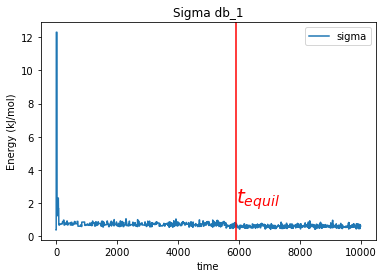

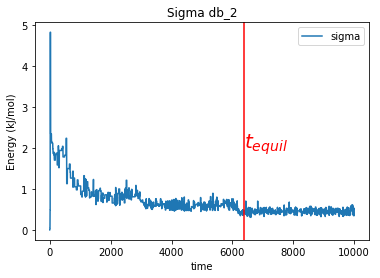

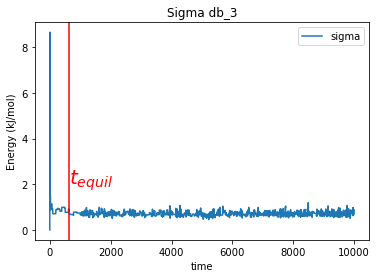

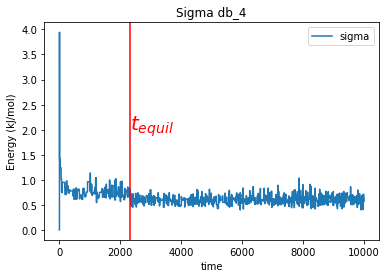

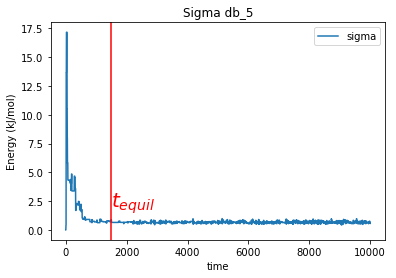

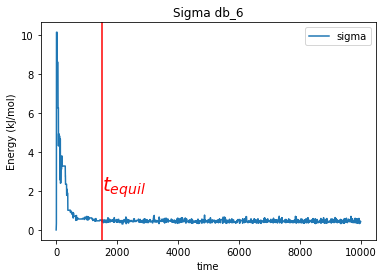

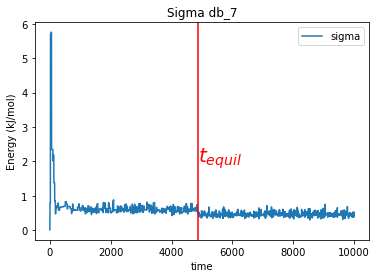

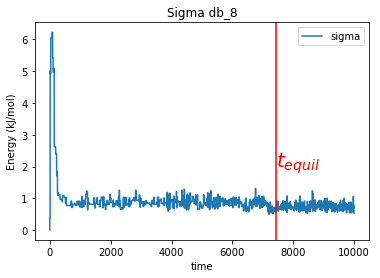

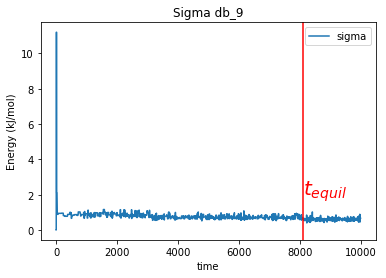

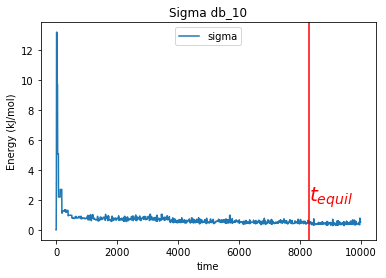

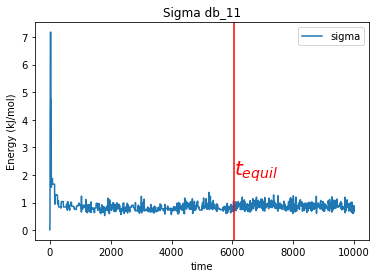

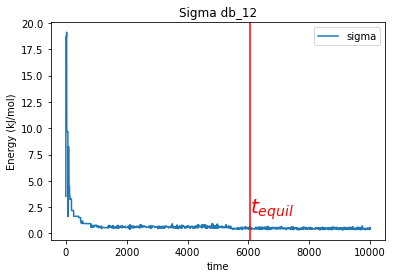

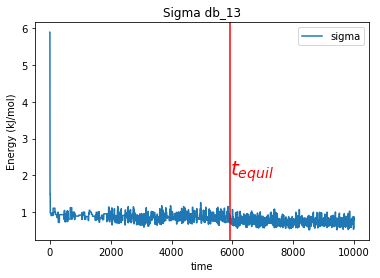

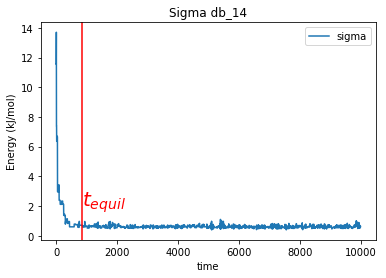

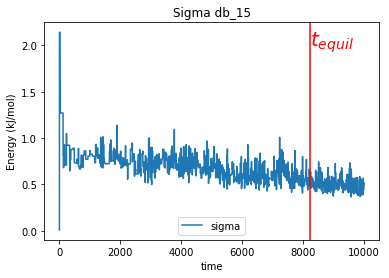

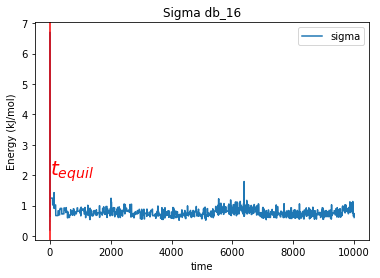

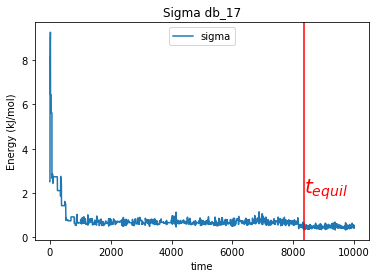

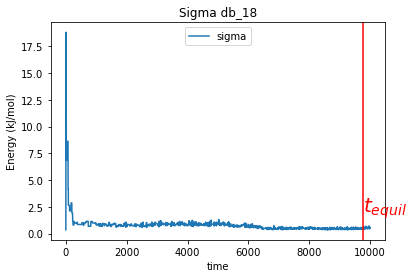

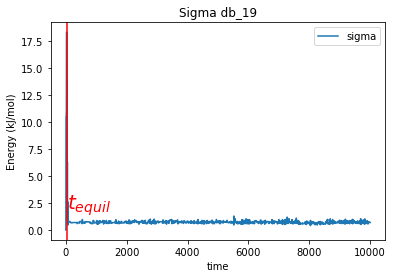

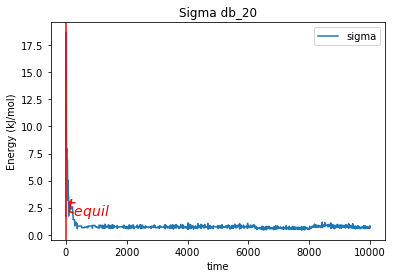

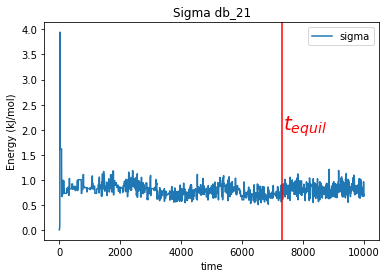

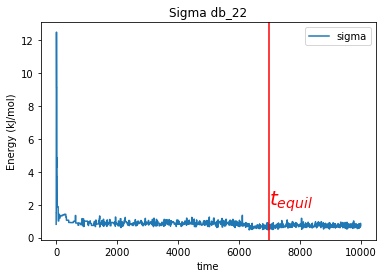

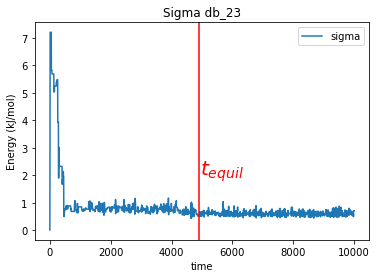

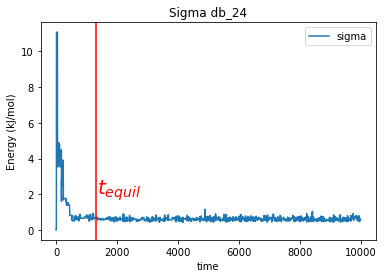

In [17]:
with PdfPages('sigma.pdf') as pdf:
    for i, db in enumerate(dbs):
        plt.figure()
        plt.plot((dbs[db].sigma[:]), label='sigma')
        plt.axvline(t_sigma[i,0], color='red')
        plt.text(t_sigma[i, 0]+10, 2, r'$t_{equil}$', color='red', fontsize=20)
        plt.legend()
        plt.xlabel('time')
        plt.ylabel('Energy (kJ/mol)')
        plt.title("Sigma {}".format(db))
        pdf.savefig()

/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/torsionfit-0+untagged.556.g949a22e-py3.5.egg/torsionfit/backends/sqlite_plus.py:153: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return trace[index]
/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


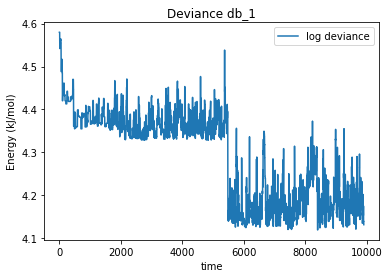

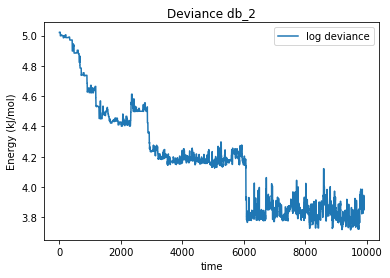

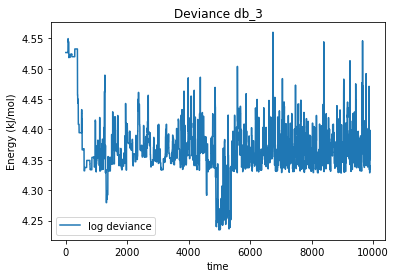

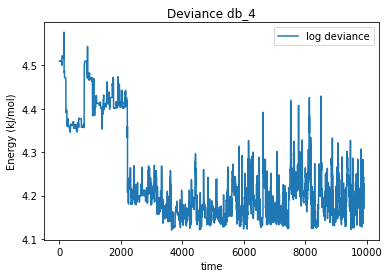

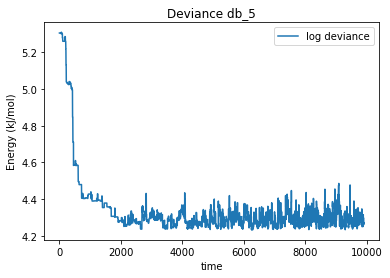

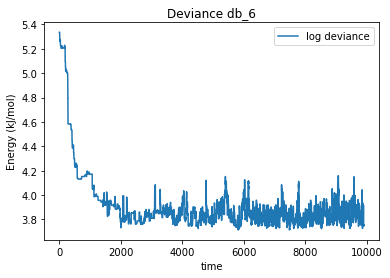

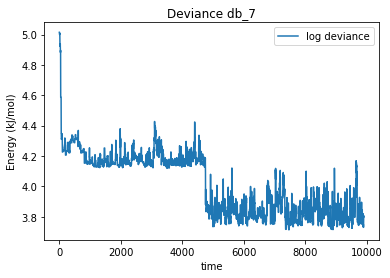

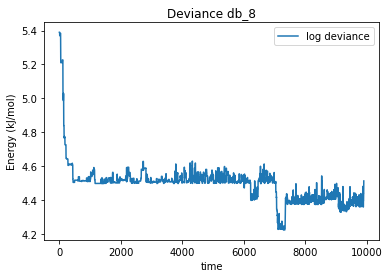

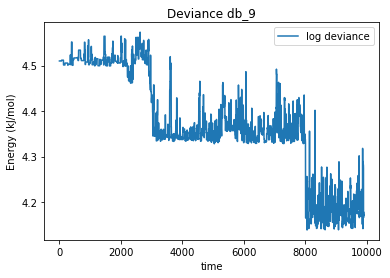

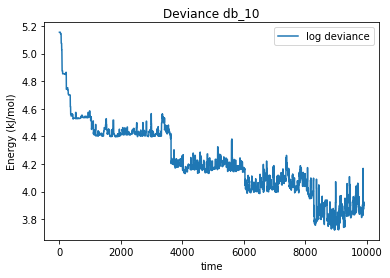

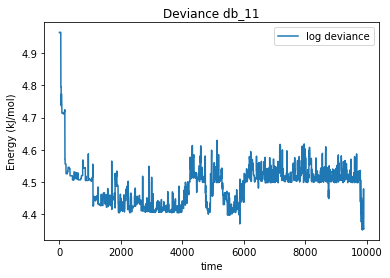

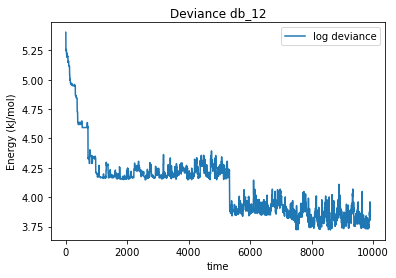

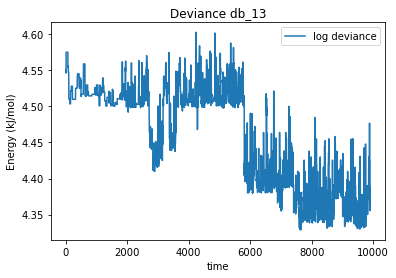

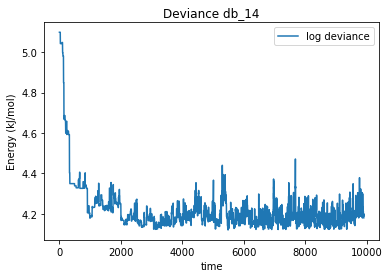

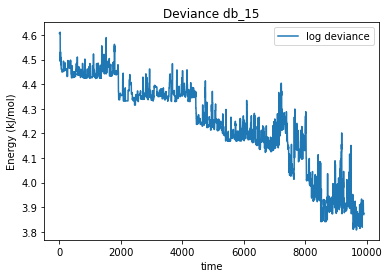

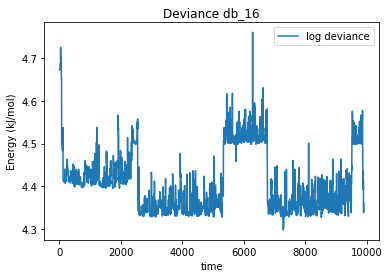

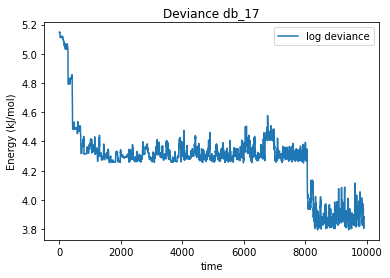

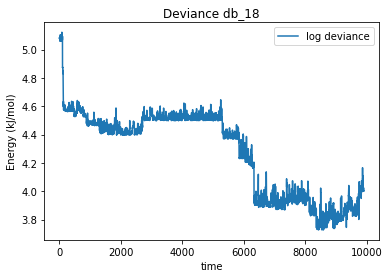

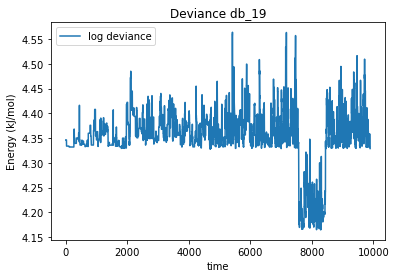

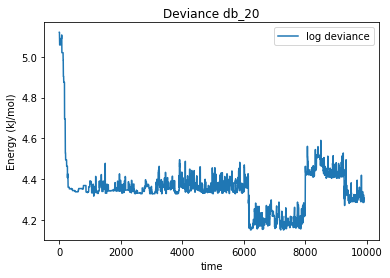

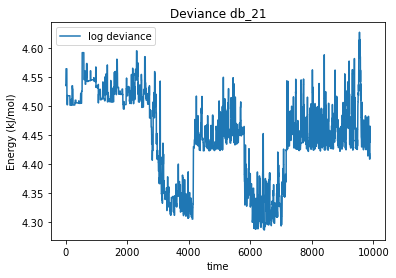

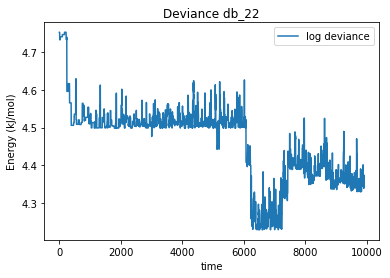

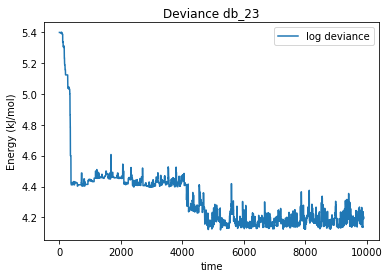

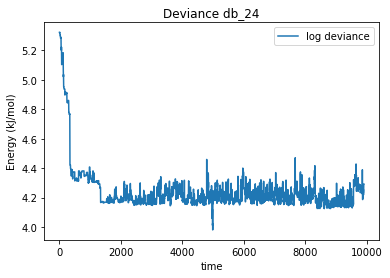

In [26]:
with PdfPages('log_deviance.pdf') as pdf:
    for i, db in enumerate(dbs):
        plt.figure()
        plt.plot(np.log(dbs[db].deviance[t_dev[i, 0]+100:]), label='log deviance')
        #plt.axvline(t_dev[i,0], color='red')
        #plt.text(t_dev[i, 0]+10, 8, r'$t_{equil}$', color='red', fontsize=20)
        plt.legend()
        plt.xlabel('time')
        plt.ylabel('Energy (kJ/mol)')
        plt.title("Deviance {}".format(db))
        pdf.savefig()

/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/torsionfit-0+untagged.556.g949a22e-py3.5.egg/torsionfit/backends/sqlite_plus.py:153: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return trace[index]
/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


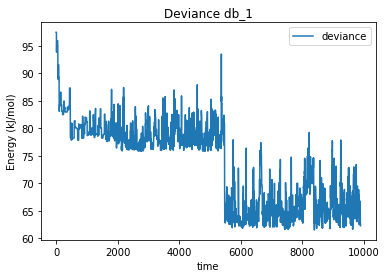

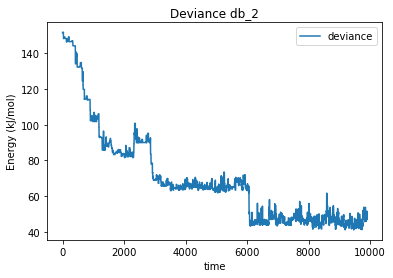

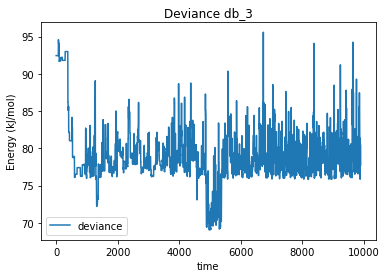

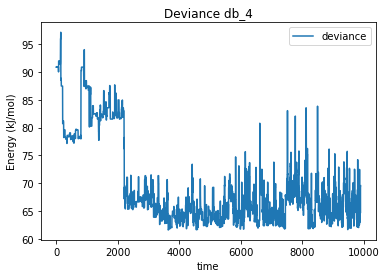

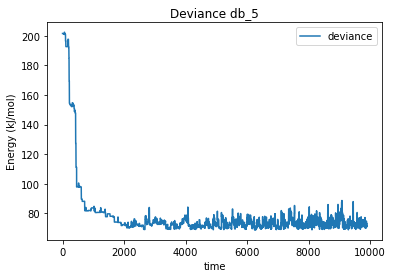

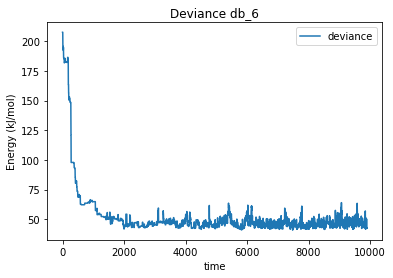

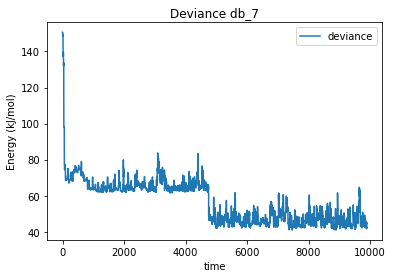

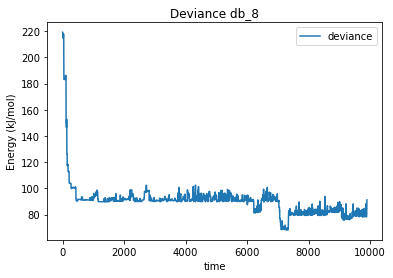

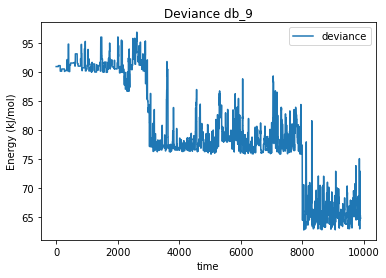

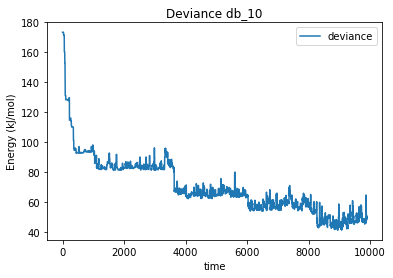

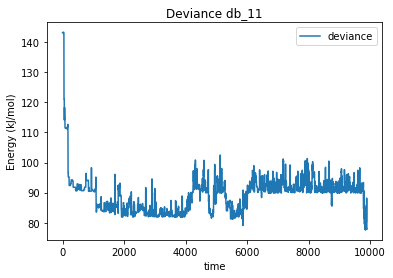

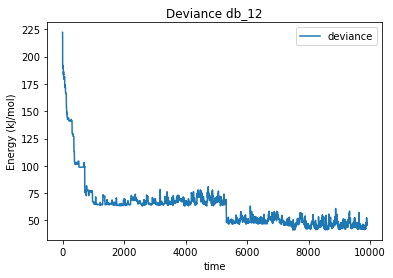

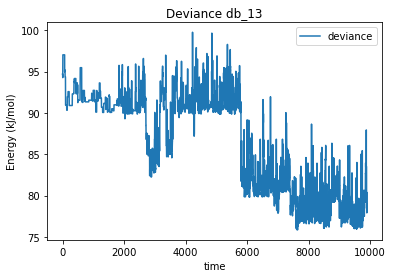

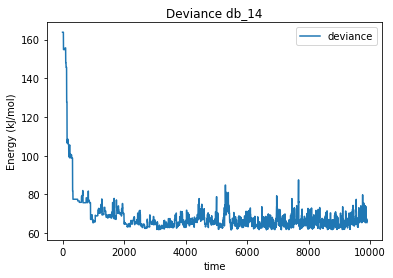

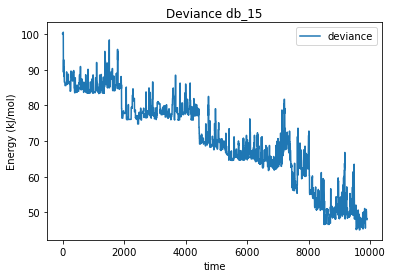

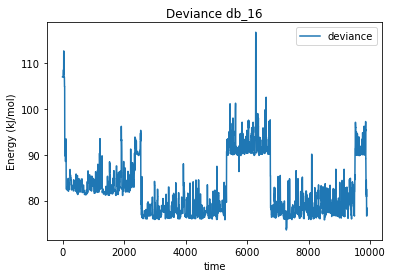

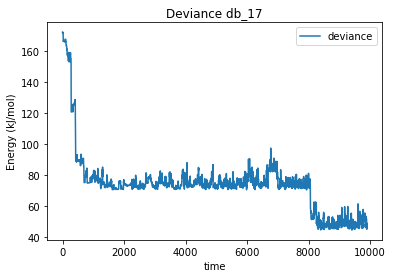

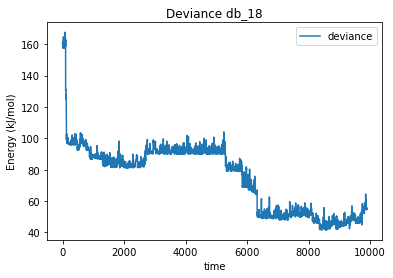

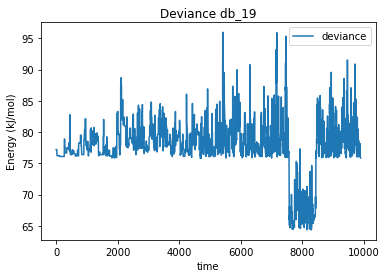

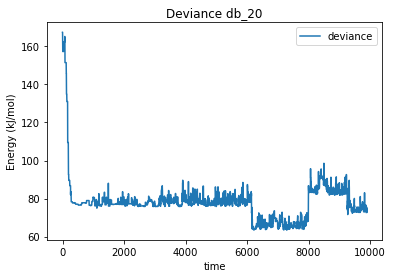

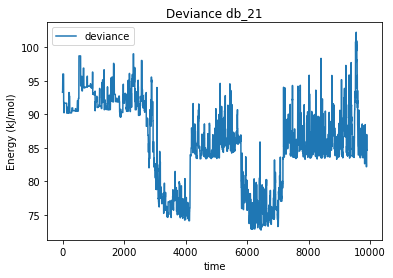

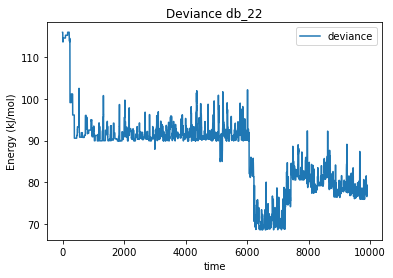

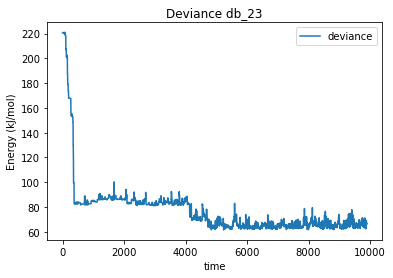

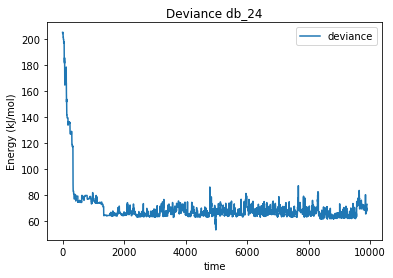

In [27]:
with PdfPages('deviance.pdf') as pdf:
    for i, db in enumerate(dbs):
        plt.figure()
        plt.plot(dbs[db].deviance[t_dev[i, 0]+100:], label='deviance')
        #plt.axvline(t_dev[i,0], color='red')
        #plt.text(t_dev[i, 0]+10, 8, r'$t_{equil}$', color='red', fontsize=20)
        plt.legend()
        plt.xlabel('time')
        plt.ylabel('Energy (kJ/mol)')
        plt.title("Deviance {}".format(db))
        pdf.savefig()

/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/torsionfit-0+untagged.556.g949a22e-py3.5.egg/torsionfit/backends/sqlite_plus.py:153: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return trace[index]
/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


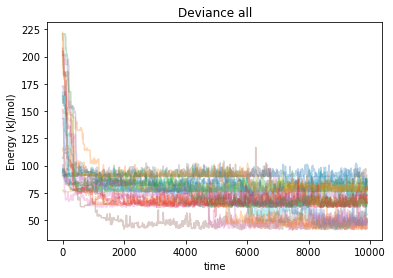

In [291]:
with PdfPages('deviance_all.pdf') as pdf:
    for i, db in enumerate(dbs):
        plt.plot(dbs[db].deviance[t_dev[i, 0]+100:], alpha=0.3)
        #plt.axvline(t_dev[i,0], color='red')
        #plt.text(t_dev[i, 0]+10, 8, r'$t_{equil}$', color='red', fontsize=20)
        plt.legend()
        plt.xlabel('time')
        plt.ylabel('Energy (kJ/mol)')
    plt.title("Deviance all")
    pdf.savefig()

/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


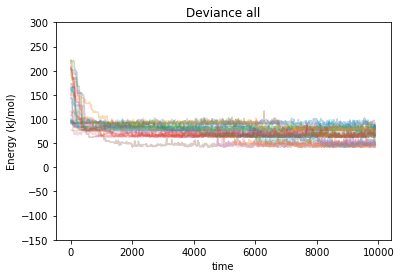

In [294]:
for i, db in enumerate(dbs):
    plt.plot(dbs[db].deviance[100:], alpha=0.3)
    #plt.axvline(t_dev[i,0], color='red')
    #plt.text(t_dev[i, 0]+10, 8, r'$t_{equil}$', color='red', fontsize=20)
    plt.legend()
    plt.xlabel('time')
    plt.ylabel('Energy (kJ/mol)')
    plt.ylim(-150, 300)
plt.title("Deviance all")
plt.savefig('deviance_all.png')

/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


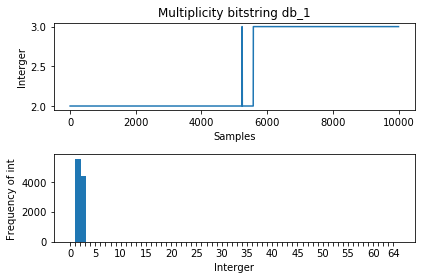

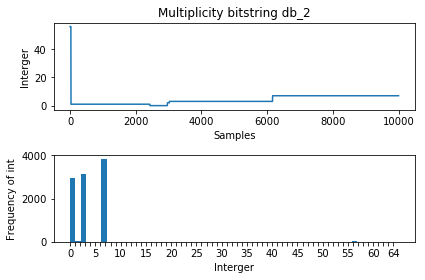

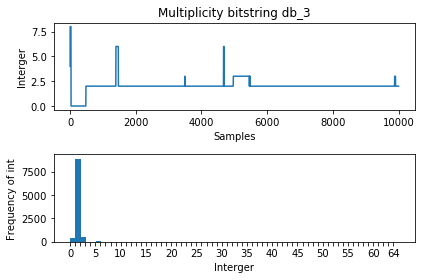

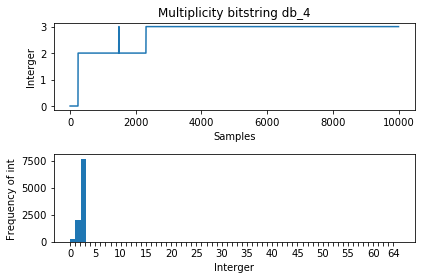

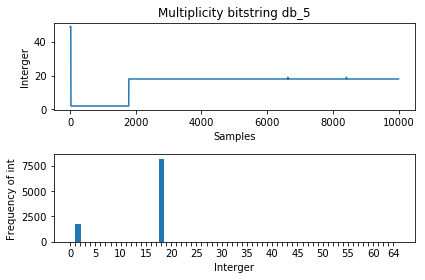

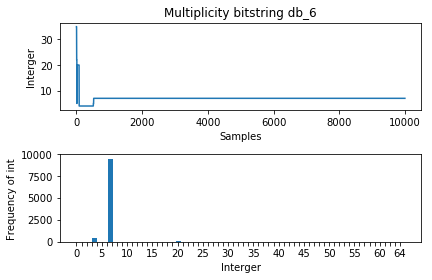

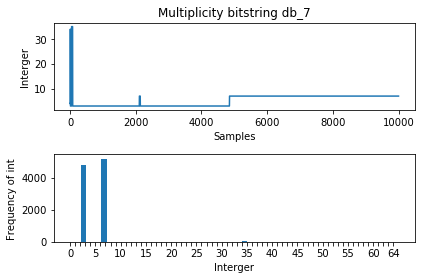

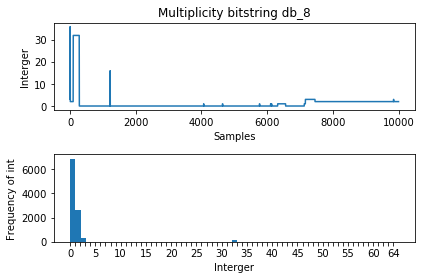

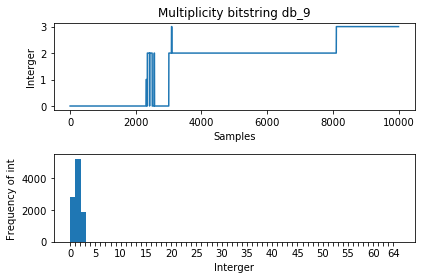

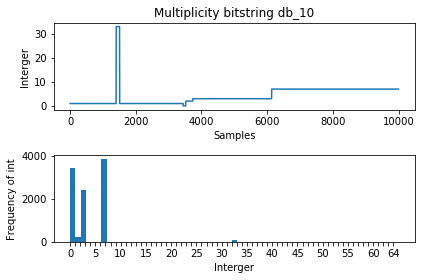

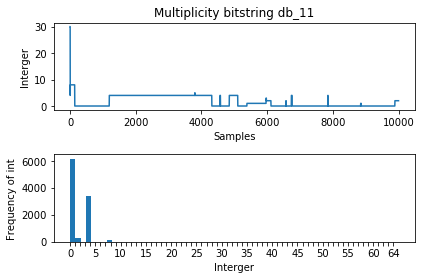

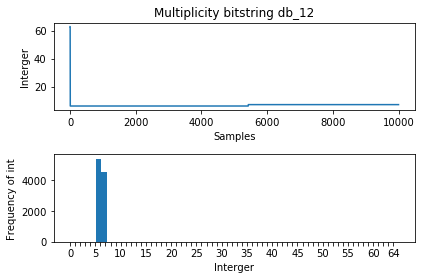

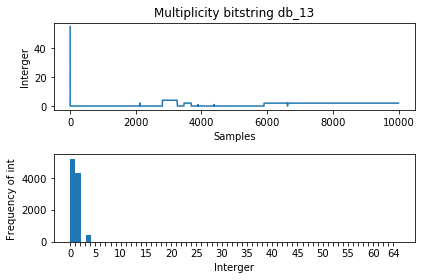

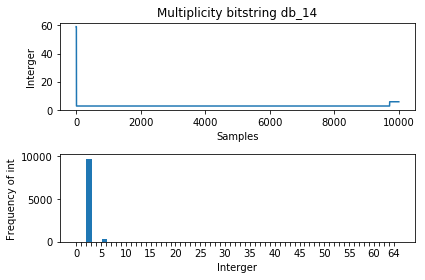

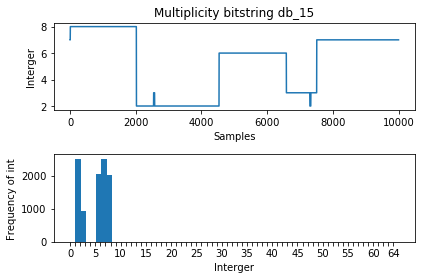

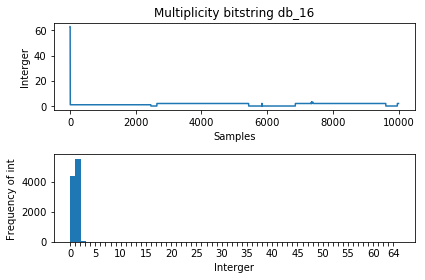

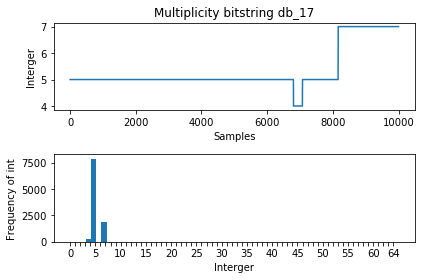

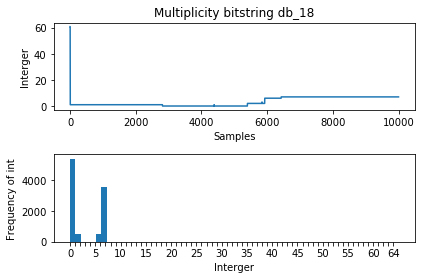

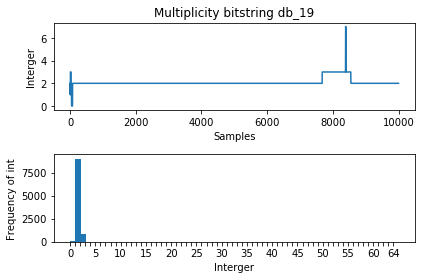

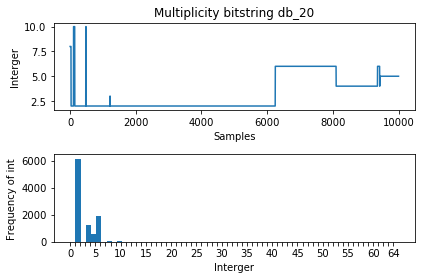

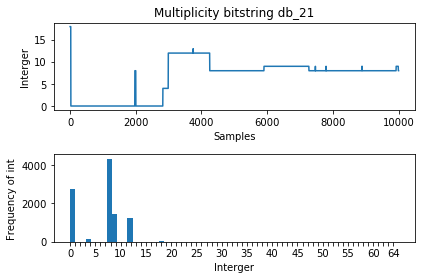

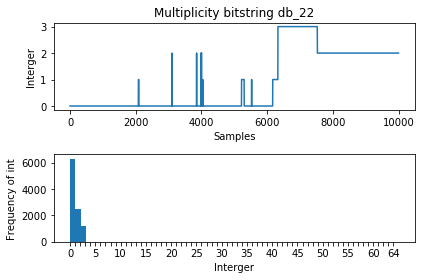

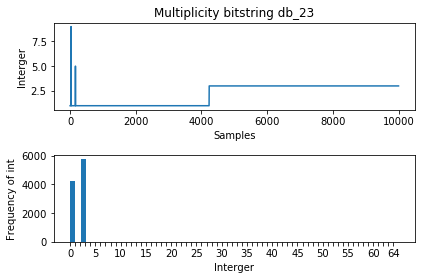

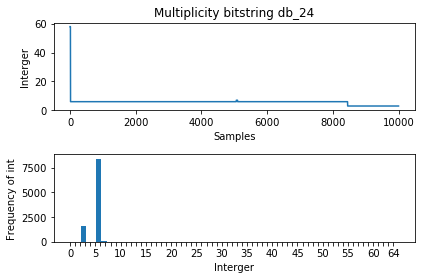

In [56]:
with PdfPages('multiplicity_bitstrings.pdf') as pdf: 
    bins = np.linspace(0, 65, 64)
    for db in dbs:
        plt.figure()
        plt.subplot(2, 1, 1)
        plt.title('Multiplicity bitstring {}'.format(db))
        plt.plot(dbs[db].CG331_CG321_CG321_CG331_multiplicity_bitstring[:])
        plt.ylabel('Interger')
        plt.xlabel('Samples')
        plt.subplot(2, 1, 2)
        plt.hist(dbs[db].CG331_CG321_CG321_CG331_multiplicity_bitstring[:], bins=bins)
        plt.xticks(np.linspace(0, 64, 65), [0,'','','', '', 5, '', '', '', '', 10,'', '', '', '', 15,'', '', '', '',
                                        20,'', '', '', '', 25,'', '', '', '', 30, '', '', '', '',35,'', '', '', '',
                                        40,'', '', '', '', 45,'', '', '', '', 50,'', '', '', '', 55,'', '', '', '', 
                                        60, '', '', '', 64,])
        plt.xlabel('Interger')
        plt.ylabel('Frequency of int')
        plt.tight_layout()
        plt.tight_layout()
        pdf.savefig()

In [66]:
model = Model.TorsionFitModel(param, optimized_0, rj=True,
                                            param_to_opt=param_to_opt, sample_n5=True)

/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


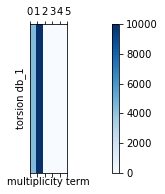

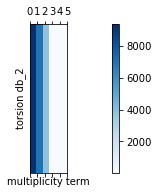

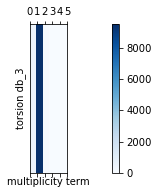

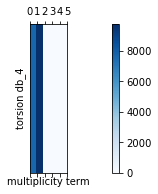

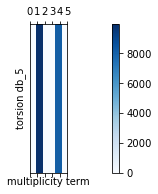

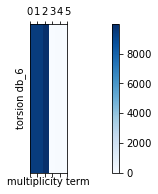

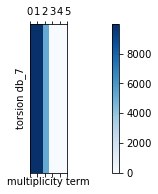

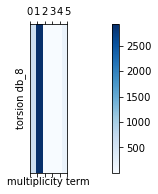

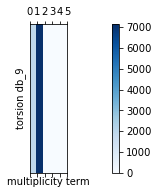

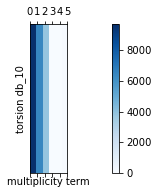

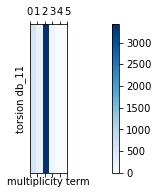

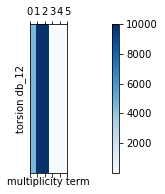

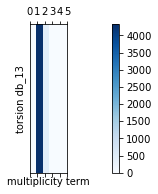

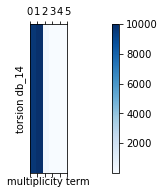

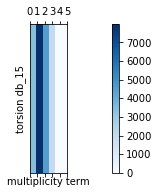

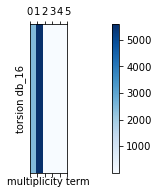

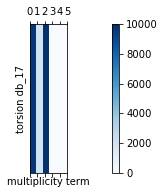

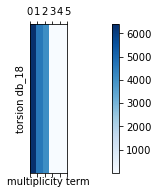

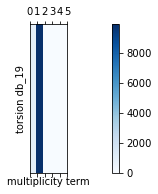

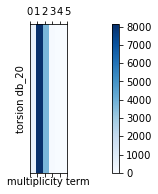

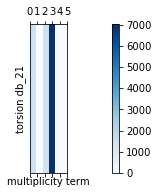

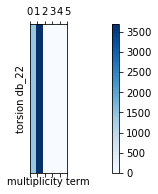

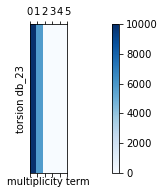

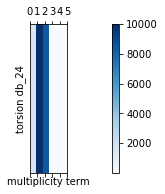

In [70]:
samples = 10000
burn = 0
multiplicities = (1,2,3,4,5,6)
mult_bitstring = []
for i in model.pymc_parameters.keys():
    if i.split('_')[-1] == 'bitstring':
        mult_bitstring.append(i)
        
with PdfPages('marg_mult.pdf') as pdf:
    for db in dbs:
        plt.figure()

        histogram = np.zeros((len(mult_bitstring), samples, 6))

        for m, torsion in enumerate(mult_bitstring):
            for i, j in enumerate(dbs[db].trace('%s' % torsion)[burn:]):
                for k, l in enumerate(multiplicities):
                    if 2**(l-1) & int(j):
                        histogram[m][i][k] = 1

        plt.matshow(histogram.sum(1), cmap='Blues',  extent=[0, 5, 0, 20]), plt.colorbar()
        plt.yticks([])
        plt.xlabel('multiplicity term')
        plt.ylabel('torsion {}'.format(db))
        pdf.savefig()

/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/torsionfit-0+untagged.556.g949a22e-py3.5.egg/torsionfit/backends/sqlite_plus.py:153: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return trace[index]
/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


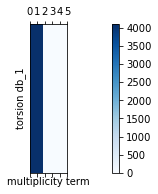

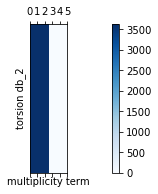

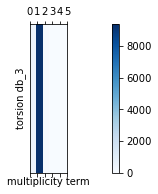

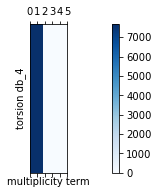

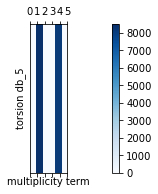

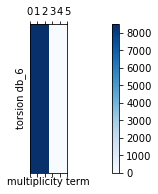

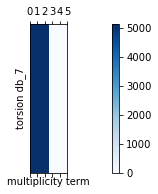

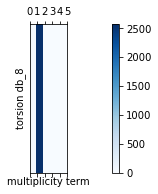

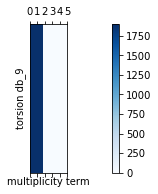

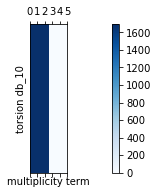

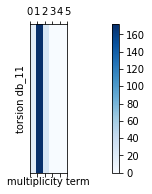

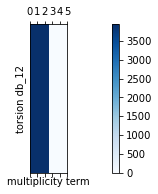

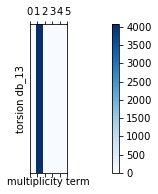

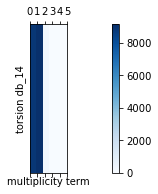

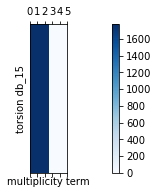

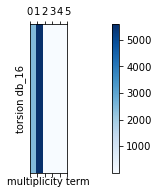

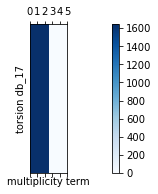

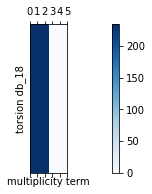

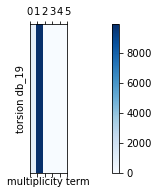

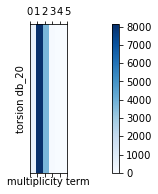

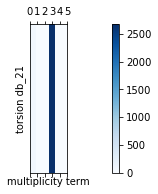

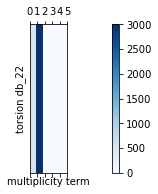

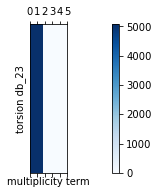

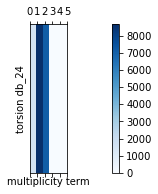

In [71]:
samples = 10000
burn = 0
multiplicities = (1,2,3,4,5,6)
mult_bitstring = []
for i in model.pymc_parameters.keys():
    if i.split('_')[-1] == 'bitstring':
        mult_bitstring.append(i)
        
with PdfPages('marg_mult_equil.pdf') as pdf:
    for i, db in enumerate(dbs):
        plt.figure()

        histogram = np.zeros((len(mult_bitstring), samples, 6))

        for m, torsion in enumerate(mult_bitstring):
            for i, j in enumerate(dbs[db].trace('%s' % torsion)[t_sigma[i,0]:]):
                for k, l in enumerate(multiplicities):
                    if 2**(l-1) & int(j):
                        histogram[m][i][k] = 1

        plt.matshow(histogram.sum(1), cmap='Blues',  extent=[0, 5, 0, 20]), plt.colorbar()
        plt.yticks([])
        plt.xlabel('multiplicity term')
        plt.ylabel('torsion {}'.format(db))
        pdf.savefig()

/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


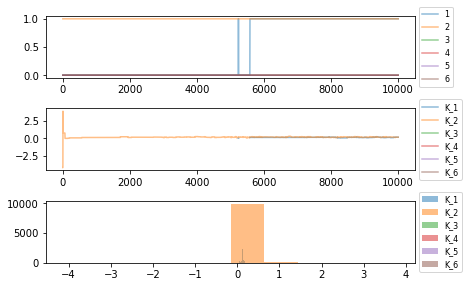

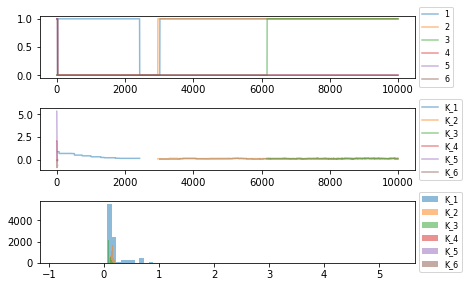

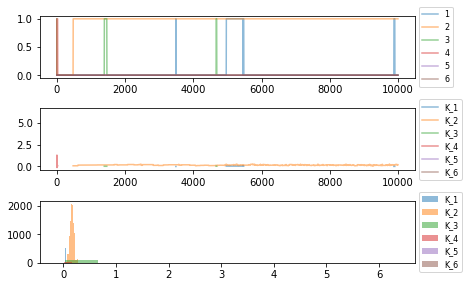

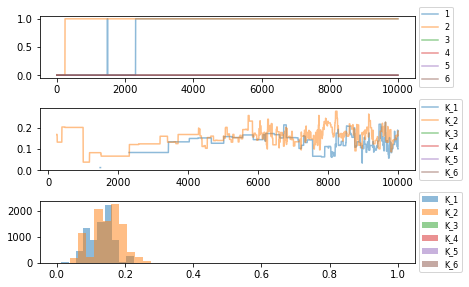

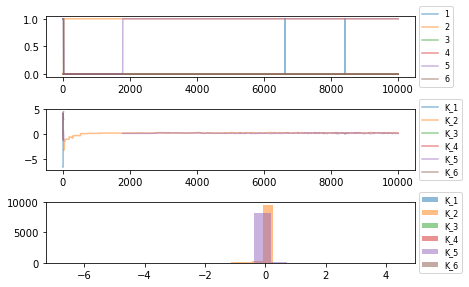

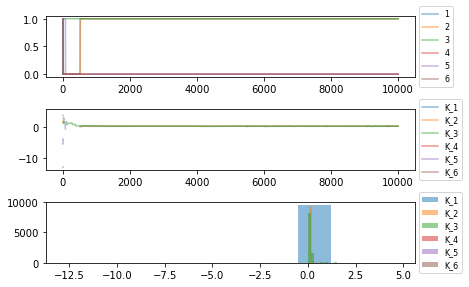

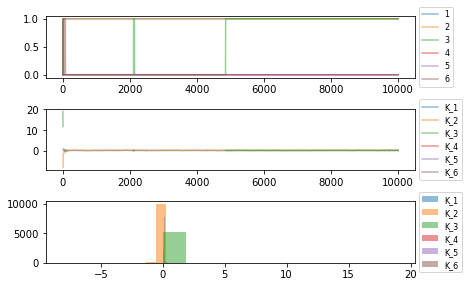

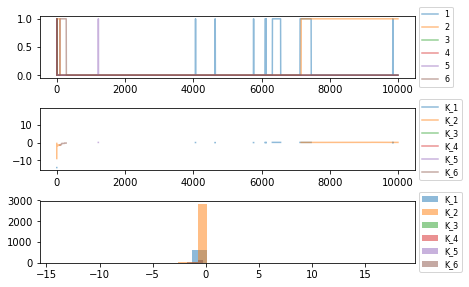

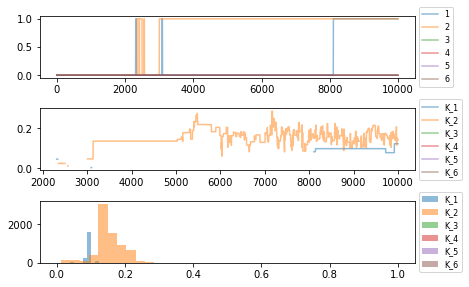

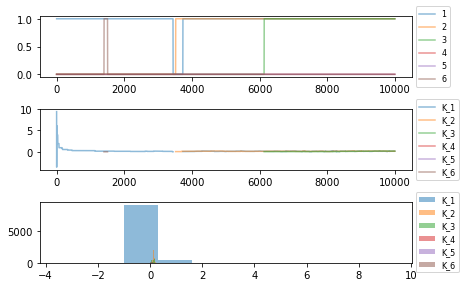

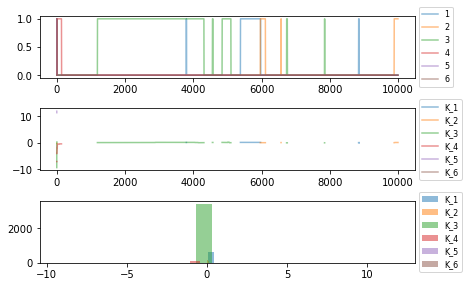

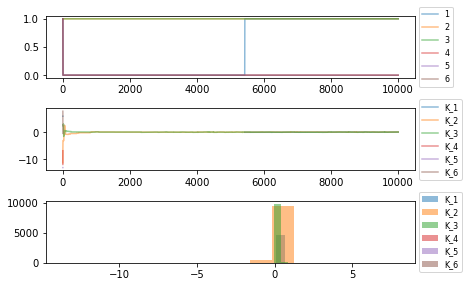

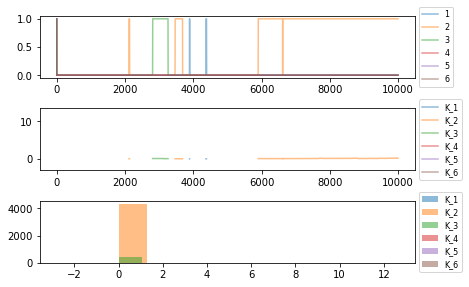

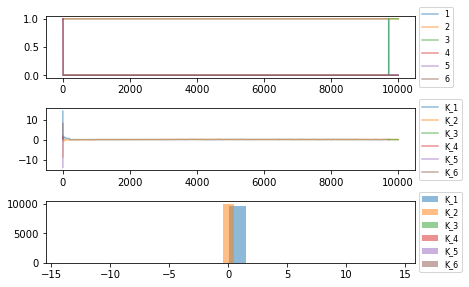

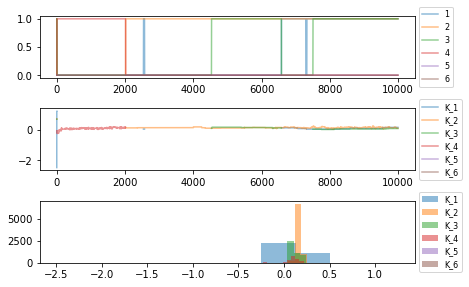

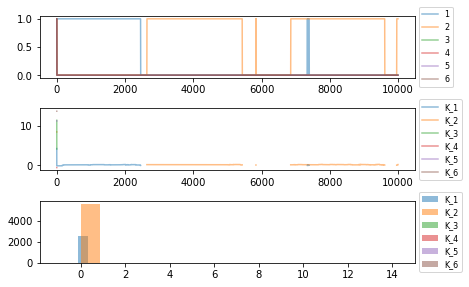

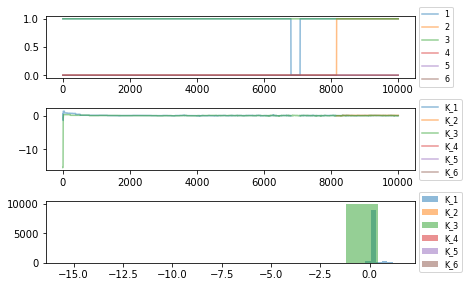

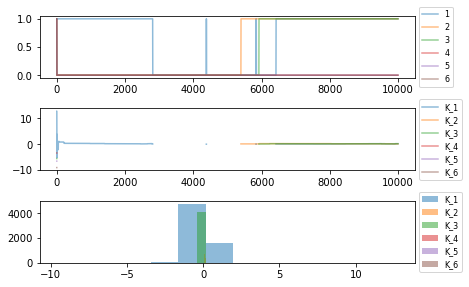

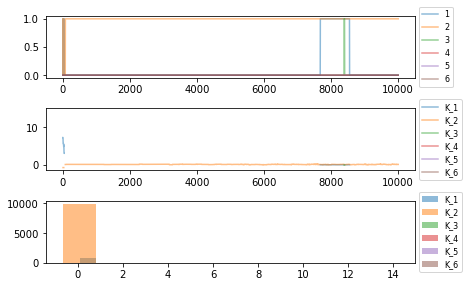

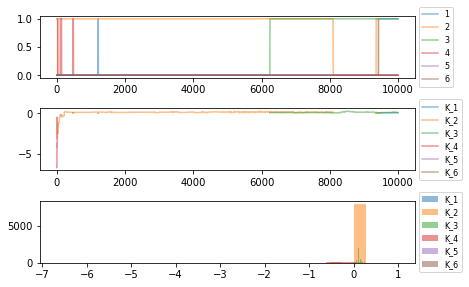

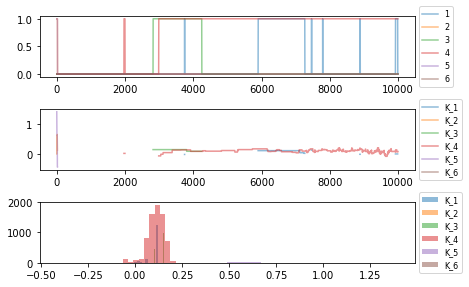

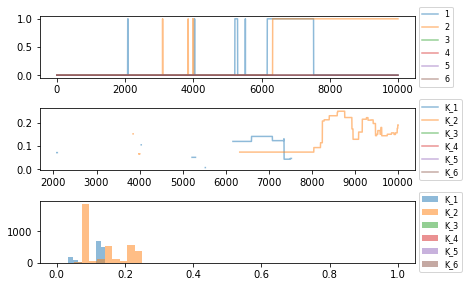

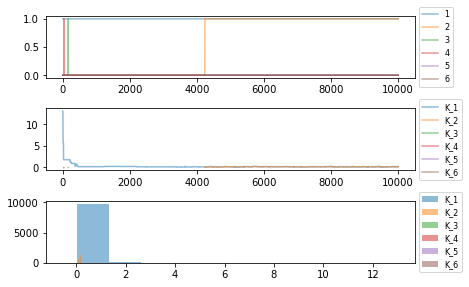

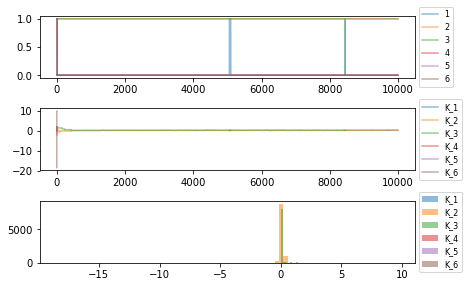

In [221]:
alpha=0.5               
with PdfPages('hist_traces_all.pdf') as pdf:
    for n, db in enumerate(dbs):
        plt.figure()
        histogram = np.zeros((len(mult_bitstring), samples, 6))
        for m, torsion in enumerate(mult_bitstring):
            for i, j in enumerate(dbs[db].trace('%s' % torsion)[:]):
                for k, l in enumerate(multiplicities):
                    if 2**(l-1) & int(j):
                        histogram[m][i][k] = 1
        for t in param_to_opt:
            t_name = t[0] + '_' + t[1] + '_' + t[2] + '_' + t[3]
            for m in multiplicities:
                name = t_name + '_' + str(m) + '_K'
                plt.subplot(3, 1, 1)
                plt.plot(histogram[0, :, m-1], label=str(m), alpha=alpha)
                lgd = plt.legend(prop={'size': 8}, loc='center left', bbox_to_anchor=(1, 0.5))
                trace = dbs[db].trace(name)[:]
                index_0 = np.where(histogram[0, :, m-1] == 0)
                index_1 = np.where(histogram[0, :, m-1] == 1)
                np.place(trace, histogram[0, :, m-1] == 0, np.ones(len(index_0[0]))*np.nan)
                plt.subplot(3, 1, 2)
                plt.plot(trace, label='K_{}'.format(m), alpha=alpha)
                lgd = plt.legend(prop={'size': 8}, loc='center left', bbox_to_anchor=(1, 0.5))
                plt.subplot(3, 1, 3)
                plt.hist(trace[index_1], label='K_{}'.format(m), alpha=alpha)
                lgd = plt.legend(prop={'size': 8}, loc='center left', bbox_to_anchor=(1, 0.5))
                plt.tight_layout()
        pdf.savefig(bbox_extra_artists=(lgd,), bbox_inches='tight')

/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/torsionfit-0+untagged.556.g949a22e-py3.5.egg/torsionfit/backends/sqlite_plus.py:153: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return trace[index]
/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:22: VisibleDeprecationWarni

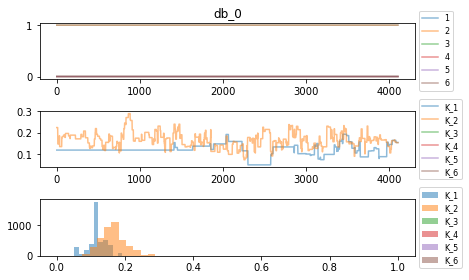

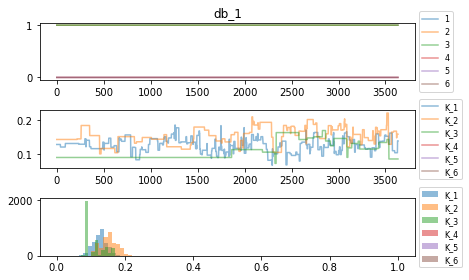

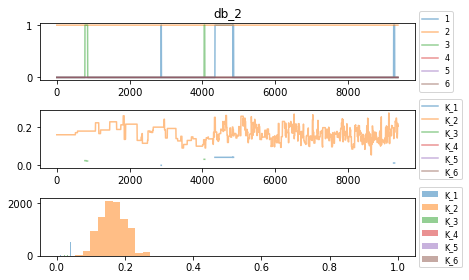

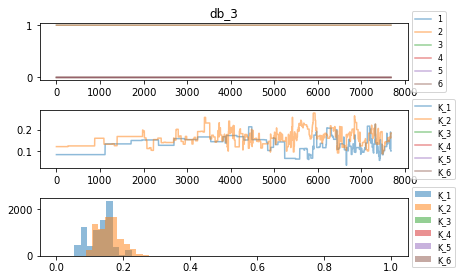

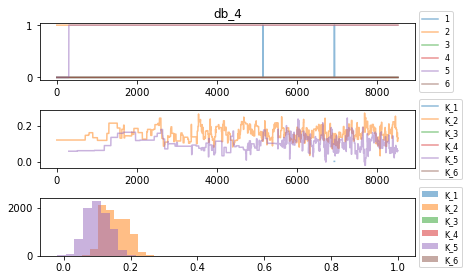

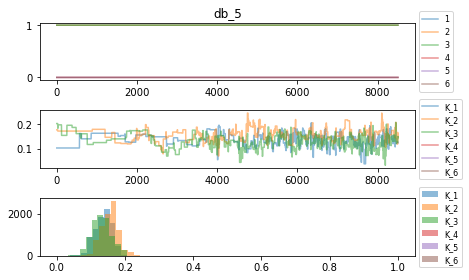

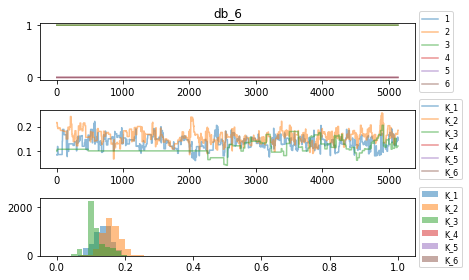

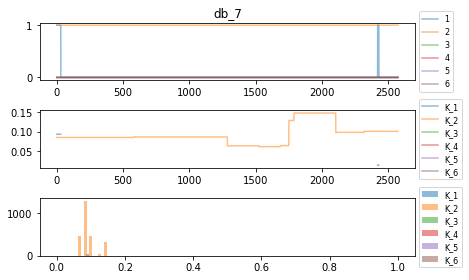

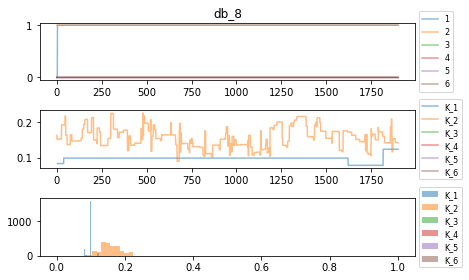

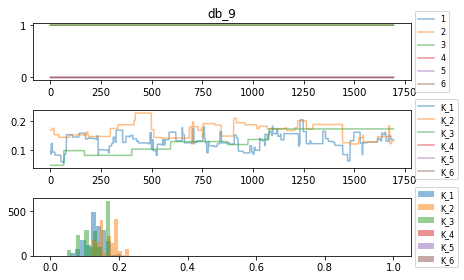

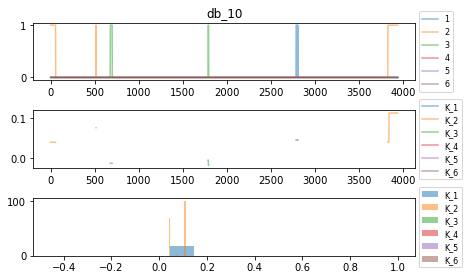

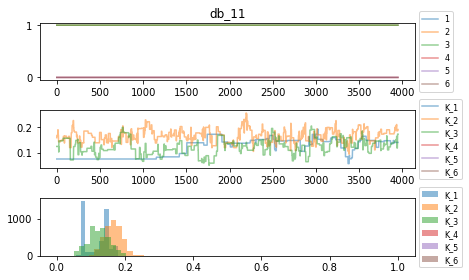

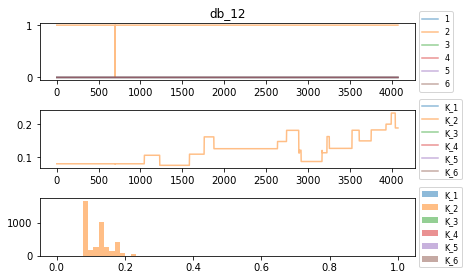

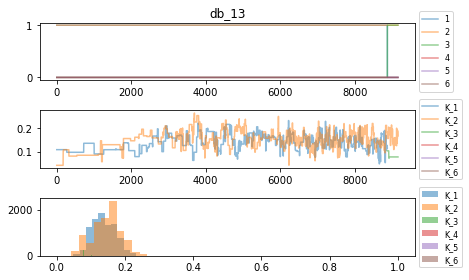

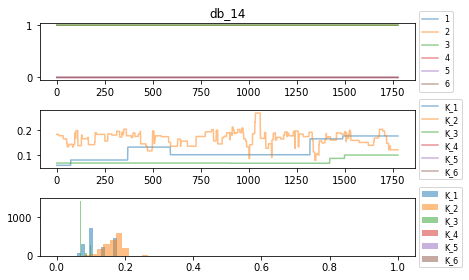

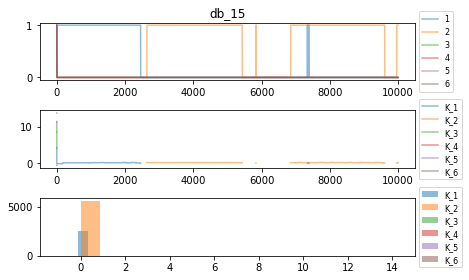

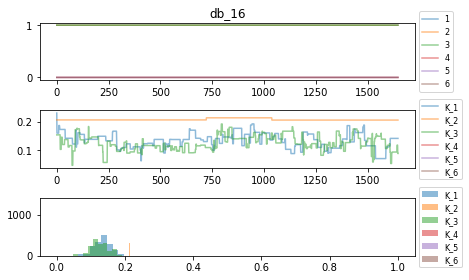

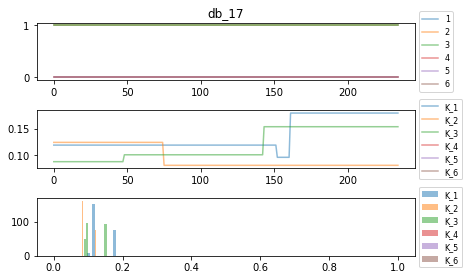

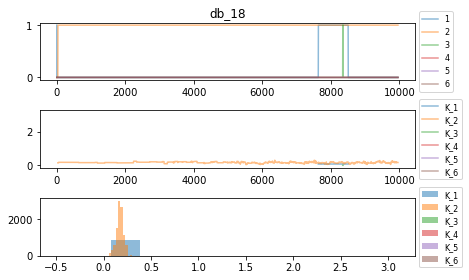

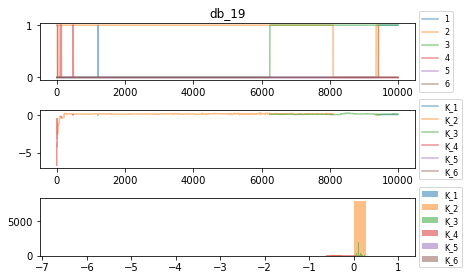

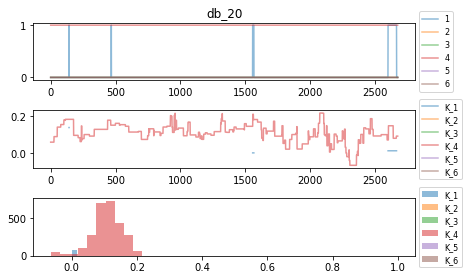

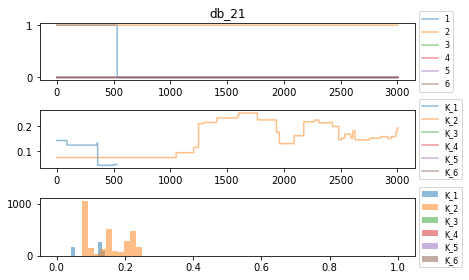

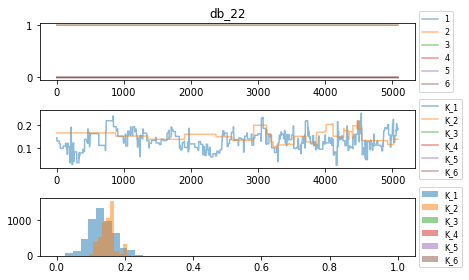

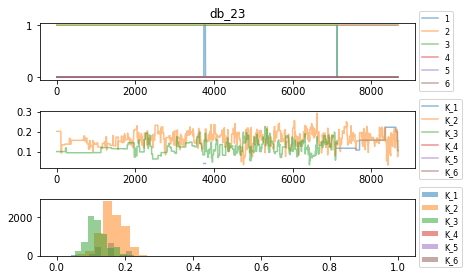

In [227]:
alpha=0.5               
with PdfPages('hist_traces.pdf') as pdf:
    for n, db in enumerate(dbs):
        plt.figure()
        histogram = np.zeros((len(mult_bitstring), samples, 6))
        for m, torsion in enumerate(mult_bitstring):
            for i, j in enumerate(dbs[db].trace('%s' % torsion)[:]):
                for k, l in enumerate(multiplicities):
                    if 2**(l-1) & int(j):
                        histogram[m][i][k] = 1
        for t in param_to_opt:
            t_name = t[0] + '_' + t[1] + '_' + t[2] + '_' + t[3]
            for m in multiplicities:
                name = t_name + '_' + str(m) + '_K'
                plt.subplot(3, 1, 1)
                plt.title('{}'.format(db))
                plt.plot(histogram[0, t_sigma[n,0]:, m-1], label=str(m), alpha=alpha)
                lgd = plt.legend(prop={'size': 8}, loc='center left', bbox_to_anchor=(1, 0.5))
                trace = dbs[db].trace(name)[t_sigma[n,0]:]
                index_0 = np.where(histogram[0, t_sigma[n,0]:, m-1] == 0)
                index_1 = np.where(histogram[0, t_sigma[n,0]:, m-1] == 1)
                np.place(trace, histogram[0, t_sigma[n,0]:, m-1] == 0, np.ones(len(index_0[0]))*np.nan)
                plt.subplot(3, 1, 2)
                plt.plot(trace, label='K_{}'.format(m), alpha=alpha)
                lgd = plt.legend(prop={'size': 8}, loc='center left', bbox_to_anchor=(1, 0.5))
                plt.subplot(3, 1, 3)
                plt.hist(trace[index_1], label='K_{}'.format(m), alpha=alpha)
                lgd = plt.legend(prop={'size': 8}, loc='center left', bbox_to_anchor=(1, 0.5))
                plt.tight_layout()
        pdf.savefig(bbox_extra_artists=(lgd,), bbox_inches='tight')

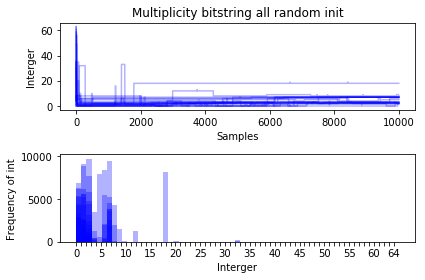

In [226]:
alpha=0.3
with PdfPages('multiplicity_all_random.pdf') as pdf: 
    bins = np.linspace(0, 65, 64)
    for db in dbs:
        plt.subplot(2, 1, 1)
        plt.title('Multiplicity bitstring all random init')
        plt.plot(dbs[db].CG331_CG321_CG321_CG331_multiplicity_bitstring[:], alpha=alpha, color='blue')
        plt.ylabel('Interger')
        plt.xlabel('Samples')
        plt.subplot(2, 1, 2)
        plt.hist(dbs[db].CG331_CG321_CG321_CG331_multiplicity_bitstring[:], bins=bins, alpha=alpha, color='blue')
        plt.xticks(np.linspace(0, 64, 65), [0,'','','', '', 5, '', '', '', '', 10,'', '', '', '', 15,'', '', '', '',
                                        20,'', '', '', '', 25,'', '', '', '', 30, '', '', '', '',35,'', '', '', '',
                                        40,'', '', '', '', 45,'', '', '', '', 50,'', '', '', '', 55,'', '', '', '', 
                                        60, '', '', '', 64,])
        plt.xlabel('Interger')
        plt.ylabel('Frequency of int')
        plt.tight_layout()
        plt.tight_layout()
    pdf.savefig()

In [ ]:
# Difference potential
# look at difference potential
new_param = CharmmParameterSet('../../../../../data/charmm_ff/top_all36_prot.rtf',
                              '../../../../../data/charmm_ff/par_all36_cgenff.prm')
new_struct = butane_scan.remove_nonoptimized()
# parameterize with db_0
par.add_missing(param_list=param_to_opt, param=new_param, sample_n5=True)
with PdfPages('difference_potential.pdf') as pdf:
    # Update parameters
    for i, db in enumerate(dbs):
        plt.figure()
        for n in range(t_sigma[i,0], 10000)
            par.update_param_from_sample(param_list=param_to_opt, param=new_param, i=i db=dbs[db], n_5=True, rj=True)

        # Check
        print(new_param.dihedral_types[param_to_opt[0]])    
        new_struct.compute_energy(new_param)
        plt.plot(optimized_0.angles, optimized_0.delta_energy-min(optimized_0.delta_energy), label='Torsion off')
        plt.plot(optimized.angles, optimized.delta_energy-min(optimized.delta_energy), label='Torsion on')
        plt.plot(new_struct.angles, new_struct.delta_energy - min(new_struct.delta_energy), label='Fit')
        plt.legend()
        plt.xlabel('Dihedral Angle (Degrees)')
        plt.ylabel('Relative Energy (KJ/mol)')
        plt.title('Butane Difference potential for {}'.format(db))
        pdf.savefig()

/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


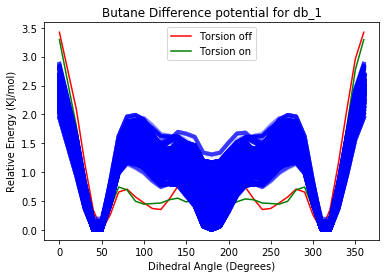

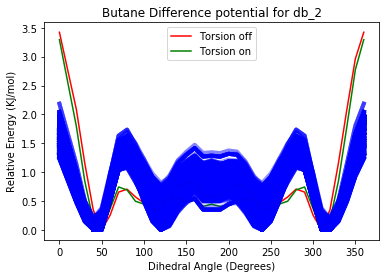

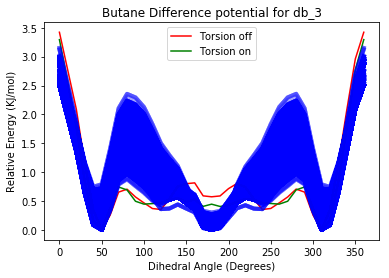

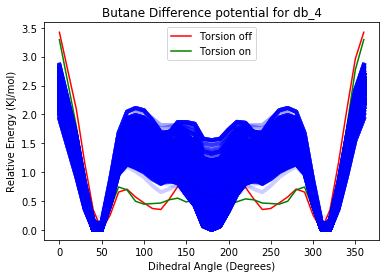

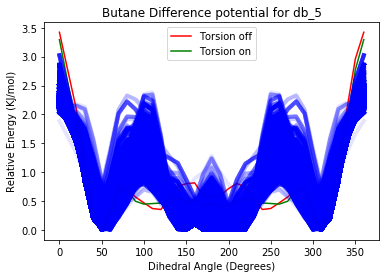

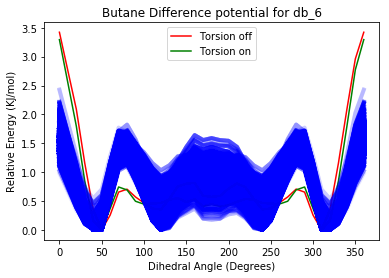

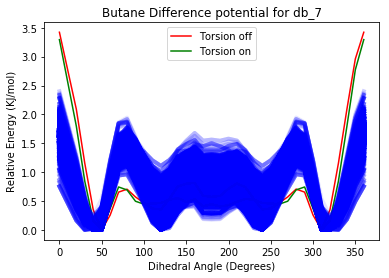

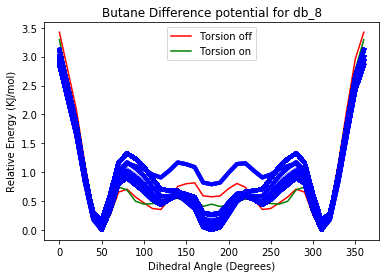

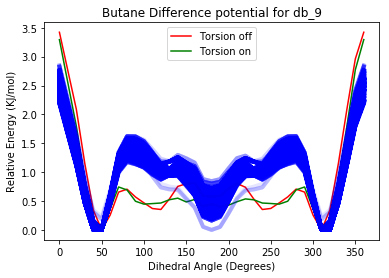

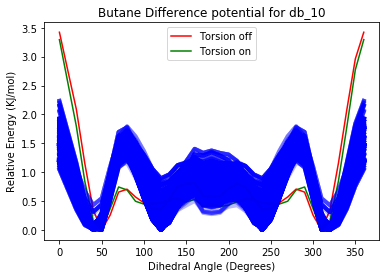

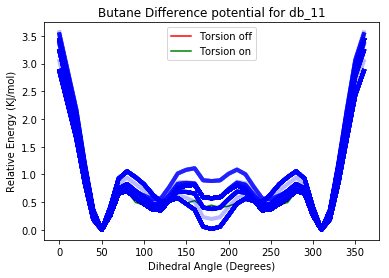

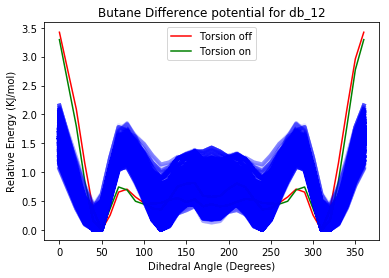

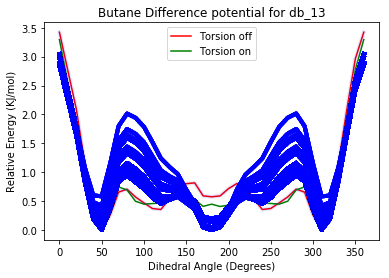

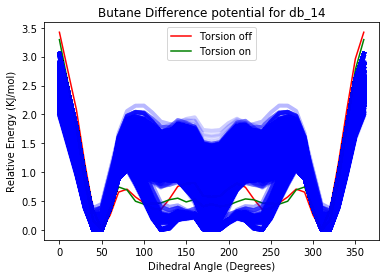

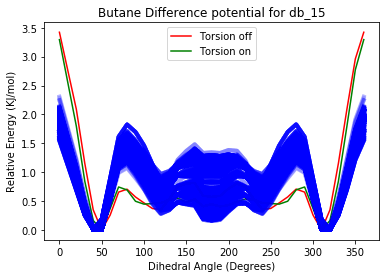

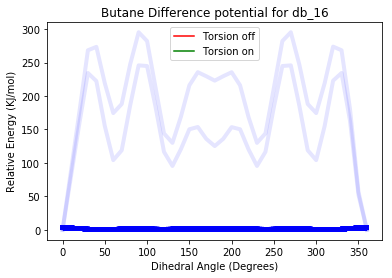

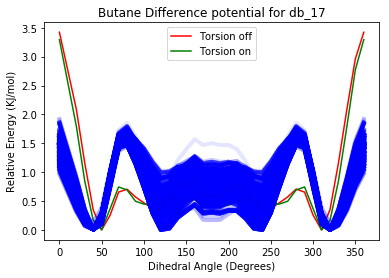

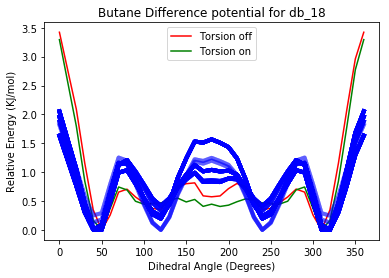

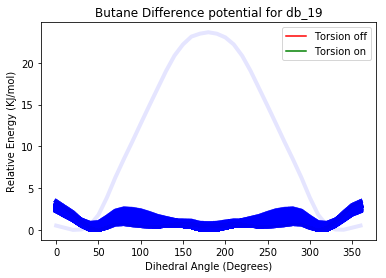

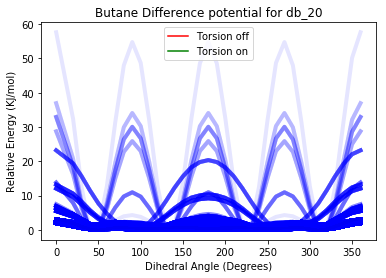

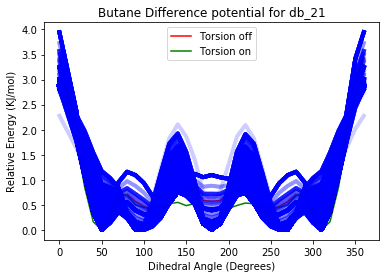

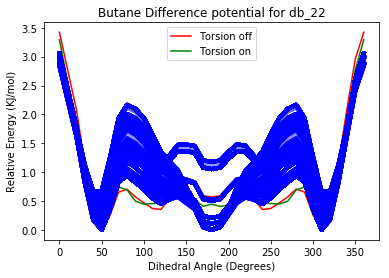

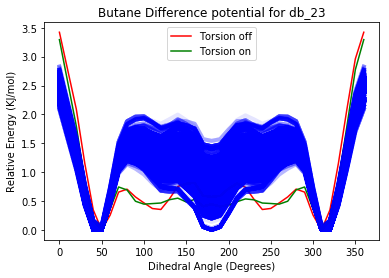

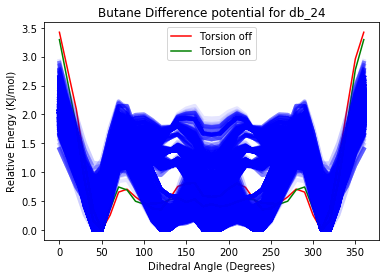

In [239]:
with PdfPages('difference_potential_traces.pdf') as pdf:
    for i, db in enumerate(dbs):
        plt.figure()
        plt.plot(optimized_0.angles, optimized_0.delta_energy-min(optimized_0.delta_energy), color='red', label='Torsion off')
        plt.plot(optimized.angles, optimized.delta_energy-min(optimized.delta_energy), color='green', label='Torsion on')
        for n in range(int(t_sigma[i,0]), 10000):
            par.update_param_from_sample(param_list=param_to_opt, param=new_param, i=n, db=dbs[db], n_5=True, rj=True) 
            new_struct.compute_energy(new_param)
            plt.plot(new_struct.angles, new_struct.delta_energy - min(new_struct.delta_energy), color='blue', alpha=0.1, linewidth=4)
            plt.legend()
            plt.xlabel('Dihedral Angle (Degrees)')
            plt.ylabel('Relative Energy (KJ/mol)')
            plt.title('Butane Difference potential for {}'.format(db))
        pdf.savefig()

In [235]:
range(int(t_sigma[0, 0]), 10000)

range(5893, 10000)

In [234]:
int(t_sigma[0, 0])

5893

In [240]:
t_sigma

array([[  5.89300000e+03,   2.28220615e+01,   1.80001266e+02],
       [  6.36600000e+03,   2.08734837e+01,   1.74144379e+02],
       [  6.19000000e+02,   2.20574379e+01,   4.25344055e+02],
       [  2.31600000e+03,   2.28295269e+01,   3.36625458e+02],
       [  1.48500000e+03,   2.49409370e+01,   3.41446686e+02],
       [  1.49100000e+03,   2.44924355e+01,   3.47454224e+02],
       [  4.85700000e+03,   1.72185097e+01,   2.98748260e+02],
       [  7.42400000e+03,   1.68820305e+01,   1.52647522e+02],
       [  8.10000000e+03,   1.12051306e+01,   1.69654419e+02],
       [  8.30500000e+03,   2.57505245e+01,   6.58627396e+01],
       [  6.05800000e+03,   1.43208494e+01,   2.75332825e+02],
       [  6.05100000e+03,   2.63068504e+01,   1.50151001e+02],
       [  5.92300000e+03,   1.03211689e+01,   3.95110291e+02],
       [  8.38000000e+02,   2.80229893e+01,   3.26981537e+02],
       [  8.22200000e+03,   1.70225391e+01,   1.04508499e+02],
       [  0.00000000e+00,   1.60067505e+02,   6.2479888

In [241]:
mode = []
var = []
for db in dbs:
    mode.append(dbs[db].CG331_CG321_CG321_CG331_multiplicity_bitstring[:].mode())

AttributeError: 'numpy.ndarray' object has no attribute 'mode'

In [286]:
from scipy import stats
mode = np.zeros((len(dbs)))
var = np.zeros((len(dbs)))
for i, db in enumerate(dbs):
    mode[i] = stats.mode(dbs[db].CG331_CG321_CG321_CG331_multiplicity_bitstring[t_sigma[i,0]:])[0]
    var[i] = dbs[db].CG331_CG321_CG321_CG331_multiplicity_bitstring[t_sigma[i,0]:].var()
plt.hist(mode, bins=mode.max())

/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/torsionfit-0+untagged.556.g949a22e-py3.5.egg/torsionfit/backends/sqlite_plus.py:153: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return trace[index]


/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/numpy/lib/function_base.py:600: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


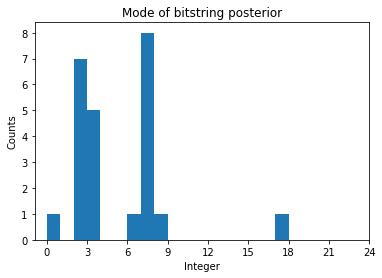

In [288]:
plt.hist(mode, bins=mode.max())
plt.xticks(np.linspace(0, 24, 9))
plt.xlabel('Integer')
plt.ylabel('Counts')
plt.title('Mode of bitstring posterior')
plt.savefig('mult_mode.pdf')

In [287]:
var

array([  0.00000000e+00,   0.00000000e+00,   2.05537026e-01,
         0.00000000e+00,   8.70435398e+00,   0.00000000e+00,
         0.00000000e+00,   1.45339445e-02,   2.10083102e-03,
         0.00000000e+00,   2.78286293e-01,   0.00000000e+00,
         9.80872918e-04,   2.72173138e-01,   0.00000000e+00,
         1.39181519e+00,   0.00000000e+00,   0.00000000e+00,
         1.23964525e-01,   2.94124188e+00,   2.86709212e-02,
         1.45834423e-01,   0.00000000e+00,   1.33041303e+00])

In [283]:
stats.variation?